In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from mapmanagercore import MapAnnotations, MultiImageLoader
import matplotlib.pyplot as plt

In [3]:
# Create an image loader
loader = MultiImageLoader()

# add image channels to the loader
loader.read("../data/rr30a_s0u/t0/rr30a_s0_ch1.tif", channel=0)
loader.read("../data/rr30a_s0u/t0/rr30a_s0_ch2.tif", channel=1)

# loader.read("../data/rr30a_s0u/t0/rr30a_s0_ch1.tif", channel=0, time=1)
# loader.read("../data/rr30a_s0u/t0/rr30a_s0_ch2.tif", channel=1, time=1)


# Create the annotation map
map = MapAnnotations(loader.build(),
                     lineSegments="../data/rr30a_s0u/line_segments.csv",
                     points="../data/rr30a_s0u/points.csv")
map.points[:]
map.segments[:]

# save the annotation map
map.save("../data/rr30a_s0u.mmap")
map.close()

/Users/work/Desktop/source/WebMapManager/src/MapManagerCore/mapmanagercore/lazy_geo_pandas/schema.py:140: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, key] = df.loc[:, key].fillna(defaults[key])
/Users/work/Desktop/source/WebMapManager/src/MapManagerCore/mapmanagercore/lazy_geo_pd_images/store.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shapes.rename(columns={shapeKey: "shape"}, inplace=True)
/Users/work/miniconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [3]:
map = MapAnnotations.load("../data/rr30a_s0u.mmap")

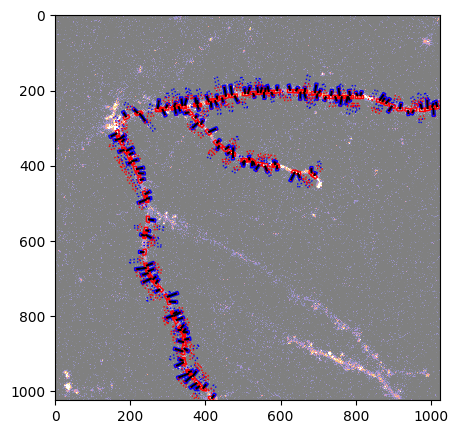

In [5]:
fig, ax = plt.subplots(figsize=(5, 5))

map.points["anchorLine"].plot(color='black', ax=ax)
map.points["point"].plot(color='red', marker='o', markersize=2, ax=ax)

map.points["roiHead"].plot(edgecolor='blue', color=(0,0,0,0), ax=ax)
map.points["roiHeadBg"].plot(edgecolor='blue', linestyle='dotted', color=(0,0,0,0), ax=ax)

map.points["roiBase"].plot(edgecolor='red', color=(0,0,0,0), ax=ax)
map.points["roiBaseBg"].plot(edgecolor='red', linestyle='dotted', color=(0,0,0,0), ax=ax)

slices = map.getPixels(time=0, channel=0, zRange=(18, 36))
slices.plot(ax=ax, vmin=300, vmax=1500, alpha=0.5, cmap='CMRmap')

plt.show()

In [6]:
map.points[["roiStatsBg_ch1_max", "roiStatsBg_ch2_max", "roiStats_ch1_max", "roiStats_ch2_max"]]
# map.points[:]

,,roiStatsBg_ch1_max,roiStatsBg_ch2_max,roiStats_ch1_max,roiStats_ch2_max
spineID,t,,,,
0,0,899.0,929.0,609.0,1302.0
1,0,429.0,255.0,420.0,193.0
2,0,388.0,303.0,1096.0,800.0
3,0,722.0,1019.0,895.0,865.0
4,0,1390.0,1180.0,379.0,345.0
...,...,...,...,...,...
134,0,417.0,157.0,329.0,243.0
135,0,665.0,1014.0,1142.0,1490.0
136,0,287.0,379.0,303.0,133.0


In [7]:
timePoint = map.getTimePoint(0)
id = timePoint.addSpine(segmentId=0, x=1,y=2,z=3)
# timePoint.moveAnchor(spineId=id, x=1, y=1, z=3)
# timePoint.moveSpine(spineId=id, x=1, y=1, z=3)
# timePoint.deleteSpine(id)
# timePoint.undo()
# timePoint.redo()
# timePoint.updateSpine(spineId=id, value={
#   "f": 1,
# })
# timePoint.undo()
# timePoint.translateBackgroundRoi()
# timePoint.deleteSegment("")
id

# abb
timePoint.points["roi"].get_coordinates()
timePoint.points["roiBase"].get_coordinates()['x'].tolist()


[430.2849881999516,
 430.6636097975376,
 431.03620070272115,
 431.3993749179634,
 431.74983202185905,
 432.0843871624035,
 432.4,
 434.7873661446809,
 429.98736614468095,
 428.5413342516287,
 416.7322965161233,
 417.30227291602654,
 430.2849881999516,
 386.0,
 386.0,
 370.0,
 370.0,
 386.0,
 411.2495131446207,
 411.6597773469561,
 412.0630097411556,
 412.4549127367619,
 412.831309490351,
 413.1881884217034,
 413.5217459686256,
 413.8284271247462,
 417.77332954634005,
 421.44341855618217,
 420.87344215627894,
 415.7150118000484,
 415.3101841300142,
 414.91252890441285,
 414.5261807918322,
 414.15515689377685,
 413.8033149763665,
 413.47431335874336,
 413.1715728752538,
 409.2410140117098,
 407.000444704872,
 407.49947099411344,
 411.2495131446207,
 439.6051967780724,
 452.5186567192273,
 451.27095613144326,
 437.376149706108,
 436.9949602836599,
 436.62329395742034,
 436.26467239337387,
 435.9224936539068,
 435.6,
 434.0535552864801,
 438.85355528648006,
 439.6051967780724,
 481.0,
 481

In [8]:
from mapmanagercore.schemas.spine import Spine


map.updateSpine(spineId=1, value=Spine(
  note="This is a note",
))
map.points[(1, ), ["note"]]

,,note
spineID,t,
1,0,This is a note


In [9]:
timePoint.points[1, "note"]

'This is a note'

In [10]:
map.segments["segment"].get_coordinates(include_z=True)
# map.segments["left"]

x      y       z
segmentID t                      
0         0  354.0  240.0  31.000
          0  359.0  240.0  31.000
          0  363.0  236.0  31.000
          0  391.0  236.0  31.000
          0  395.0  232.0  31.000
...            ...    ...     ...
4         0  241.0  479.0  28.222
          0  242.0  487.0  28.111
          0  245.0  492.0  28.000
          0  245.0  503.0  27.889
          0  247.0  508.0  27.667

[221 rows x 3 columns]

In [11]:
map.points["roi"].get_coordinates()
map.points['anchorLine']

spineID  t
0        0    LINESTRING (425.000 225.400, 431.000 239.000)
1        0    LINESTRING (378.000 236.000, 382.000 250.000)
2        0    LINESTRING (414.000 228.000, 416.000 245.000)
3        0    LINESTRING (444.000 218.100, 447.000 231.000)
4        0    LINESTRING (477.000 213.000, 486.000 229.000)
                                  ...                      
135      0    LINESTRING (220.200 419.900, 236.000 420.000)
136      0    LINESTRING (242.000 487.000, 253.000 486.000)
137      0    LINESTRING (214.900 409.100, 234.000 405.000)
138      0    LINESTRING (172.000 328.000, 159.000 332.000)
139      0        LINESTRING (354.000 240.000, 1.000 2.000)
Name: anchorLine, Length: 140, dtype: geometry

In [12]:
map.points["roiBase"].get_coordinates()

x           y
spineID t                        
0       0  430.284988  228.989835
        0  430.663610  228.944569
        0  431.036201  228.863455
        0  431.399375  228.747232
        0  431.749832  228.596955
...               ...         ...
139     0  358.292893  235.050253
        0  357.343146  236.000000
        0  354.000000  236.000000
        0  354.000000  244.000000
        0  359.000000  244.000000

[2368 rows x 2 columns]

In [13]:
slices = map.getPixels(time=0, channel=0, zRange=(18, 36))

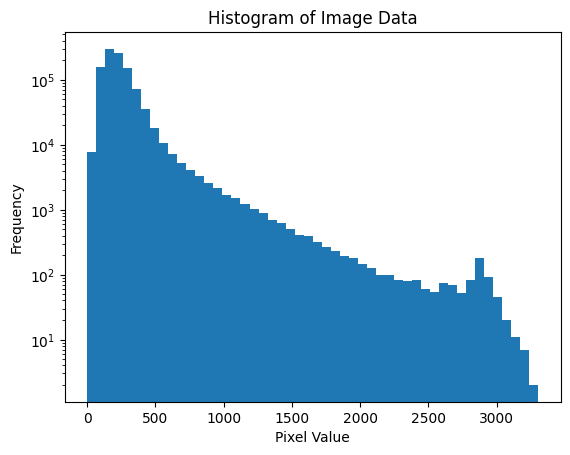

In [14]:
plt.hist(slices.data(), bins=50)
plt.yscale('log')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram of Image Data')
plt.show()

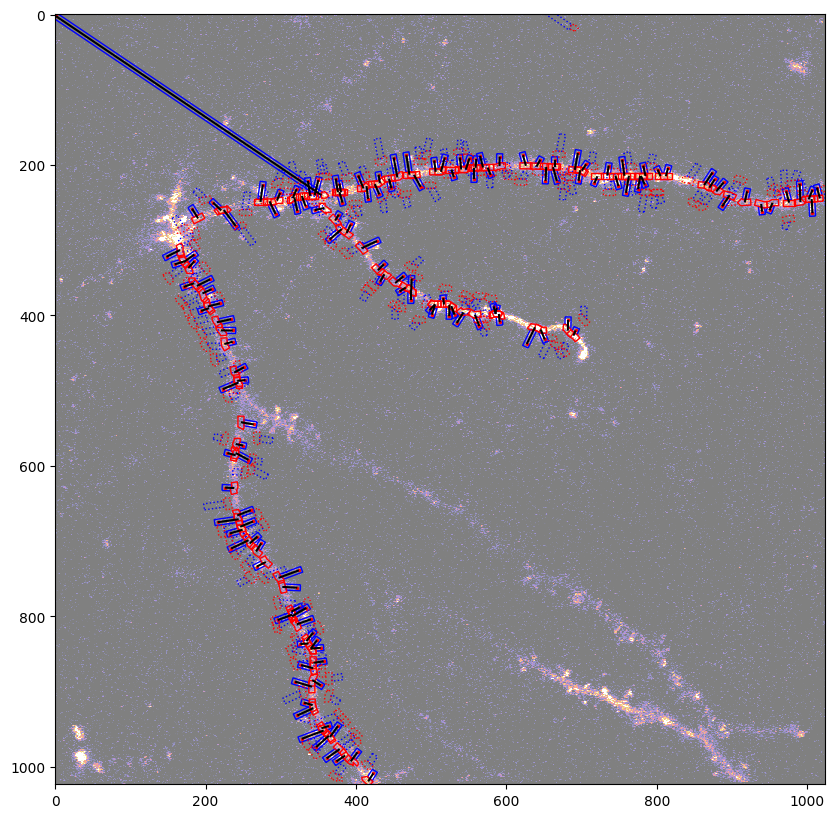

In [15]:

fig, ax = plt.subplots(figsize=(10, 10))

map.points["anchorLine"].plot(color='black', ax=ax)
map.points["point"].plot(color='red', marker='o', markersize=2, ax=ax)

map.points["roiHead"].plot(edgecolor='blue', color=(0,0,0,0), ax=ax)
map.points["roiHeadBg"].plot(edgecolor='blue', linestyle='dotted', color=(0,0,0,0), ax=ax)

map.points["roiBase"].plot(edgecolor='red', color=(0,0,0,0), ax=ax)
map.points["roiBaseBg"].plot(edgecolor='red', linestyle='dotted', color=(0,0,0,0), ax=ax)

slices.plot(ax=ax, vmin=300, vmax=1500, alpha=0.5, cmap='CMRmap')

plt.show()

In [16]:
map.points["z"].between(10, 40)

spineID  t
0        0     True
1        0     True
2        0     True
3        0     True
4        0     True
              ...  
135      0     True
136      0     True
137      0     True
138      0     True
139      0    False
Name: z, Length: 140, dtype: boolean

In [17]:
filtered = map.filterPoints(map.points["z"].between(10, 40))

In [18]:
filtered.points[:, "z"]

spineID  t
0        0    31
1        0    31
2        0    31
3        0    31
4        0    31
              ..
134      0    29
135      0    29
136      0    28
137      0    29
138      0    31
Name: z, Length: 139, dtype: Int64

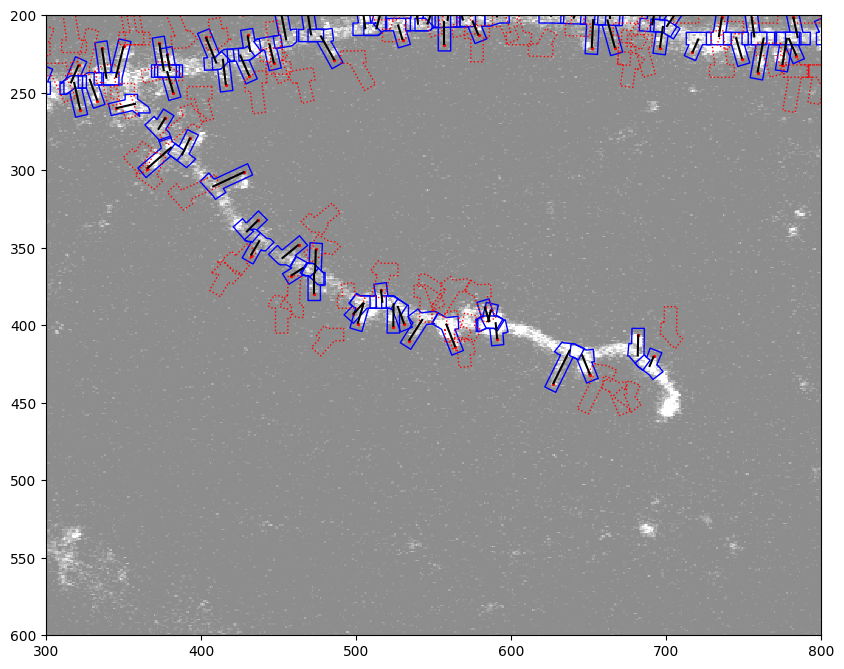

In [19]:
slices = filtered.getPixels(time=0, channel=0)

fig, ax = plt.subplots(figsize=(10, 10))

filtered.points["anchorLine"].plot(color='black', ax=ax)
filtered.points["point"].plot(color='red', marker='o', markersize=2, ax=ax)

filtered.points["roi"].plot(edgecolor='blue', color=(0,0,0,0), ax=ax)
filtered.points["roiBg"].plot(edgecolor='red', linestyle='dotted', color=(0,0,0,0), ax=ax)

slices.plot(ax=ax, vmin=300, vmax=1500, alpha=0.45, cmap='gray')

# Set x and y limits
ax.set_xlim(300, 800)
ax.set_ylim(600, 200)

plt.show()

In [20]:
layers = map.getTimePoint(0).getAnnotations(options={
    "zRange": (18, 36),
    "annotationSelections": {
      "segmentIDEditing": 1,
      "segmentIDEditingPath": None,
      "segmentID": 1,
      "spineID": 1
    },
    "showLineSegments": True,
    "showAnchors": True,
    "showLabels": True,
    "showLineSegmentsRadius": True,
    "showSpines": True,
  },
)

for layer in layers:
    coords, props = layer.coordinates()
    print("Properties:", props, "\n coords:", coords.head(2), "\n\n")

Properties: {'id': 'segment-ghost-left-ghost', 'select': 'segmentID', 'edit': 'segmentIDEditing', 'stroke': <function AnnotationsLayers._getSegments.<locals>.getStrokeColor at 0x1056ada80>, 'opacity': 127.5, 'strokeWidth': 0.5, 'offset': <function AnnotationsLayers._segmentGhost.<locals>.<lambda> at 0x17fe61b20>} 
 coords:              x           y
id                        
1   358.656854  240.343146
1   360.656854  242.343146 


Properties: {'id': 'segment-ghost-right-ghost', 'select': 'segmentID', 'edit': 'segmentIDEditing', 'stroke': <function AnnotationsLayers._getSegments.<locals>.getStrokeColor at 0x1056ada80>, 'opacity': 127.5, 'strokeWidth': 0.5, 'offset': <function AnnotationsLayers._getSegments.<locals>.offset at 0x17fe61a80>} 
 coords:         x          y
id                  
1   347.0  251.23873
1   347.0  256.00000 


Properties: {'id': 'segment-ghost-left-ghost-interaction', 'select': 'segmentID', 'edit': 'segmentIDEditing', 'stroke': [0, 0, 0, 0], 'opacity': 0.0, 'str